## Load data

In [1]:
from pathlib import Path
import pandas as pd


usecols = ['food_entity', 'disease_entity', 'sentence', 'is_cause', 'is_treat']
fd_df = pd.read_csv(
    Path('../data/food_disease.csv'),
    sep=',', quotechar='"',
    skipinitialspace=True,
    encoding='utf-8',
    on_bad_lines='skip',
    usecols=usecols).rename({'food_entity': 'term1', 'disease_entity': 'term2'}, axis=1)
fd_df['sentence'] = fd_df['sentence'].map(lambda x: x.lower())
fd_df = fd_df[fd_df.apply(lambda x: x['term1'] in x['sentence'] and x['term2'] in x['sentence'], axis=1)]
label_cols = ['is_cause', 'is_treat']
fd_df['is_cause'] = fd_df['is_cause'].astype(float).astype(int)
fd_df['is_treat'] = fd_df['is_treat'].astype(float).astype(int)

print(len(fd_df))
print(f"is_cause: {sum(fd_df['is_cause'])}")
print(f"is_treat: {sum(fd_df['is_treat'])}")
fd_df.head(3)

595
is_cause: 135
is_treat: 317


,term1,term2,sentence,is_cause,is_treat
0,bombax ceiba l. (bombacaceae) fruits,urinary stones,"interestingly, many indian tribes use bombax c...",0,1
1,ultra-processed food,obesity,ultra-processed food consumption has been asso...,1,0
2,salt,osteoporosis,salt has notoriously been blamed for causing a...,1,0


In [2]:
df_cause = pd.read_csv(
    Path('../data/crowd_truth_cause.csv'),
    sep=',', quotechar='"',
    skipinitialspace=True,
    encoding='utf-8',
    on_bad_lines='skip',
    usecols=['sentence', 'term1', 'term2']
)
df_cause['is_cause'] = 1
df_cause['is_treat'] = 0
df_treat = pd.read_csv(
    Path('../data/crowd_truth_treat.csv'),
    sep=',', quotechar='"',
    skipinitialspace=True,
    encoding='utf-8',
    on_bad_lines='skip',
    usecols=['sentence', 'term1', 'term2']
)
df_treat['is_treat'] = 1
df_treat['is_cause'] = 0
ct_df = df_cause.append(df_treat, ignore_index=True)

print(len(ct_df))
print(len(ct_df))
print(f"is_cause: {sum(ct_df['is_cause'])}")
print(f"is_treat: {sum(ct_df['is_treat'])}")
ct_df.head(3)

7968
7968
is_cause: 3984
is_treat: 3984


C:\Users\alexs\AppData\Local\Temp\ipykernel_136840\3057331150.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ct_df = df_cause.append(df_treat, ignore_index=True)


,term1,term2,sentence,is_cause,is_treat
0,AUTISM,TANTRUM,"The limited data suggest that, in children wit...",1,0
1,SLEEP PROBLEM,FAMILY STRESS,SLEEP PROBLEMs are associated with difficult b...,1,0
2,CEREBELLAR ATAXIA,DYSFUNCTION OF THE CEREBELLUM,The term CEREBELLAR ATAXIA is employed to indi...,1,0


In [3]:
fd_df['source'] = 'FoodDisease'
ct_df['source'] = 'CrowdTruth'
df = pd.concat([fd_df, ct_df])

term1 = 'term1'
term2 = 'term2'

df['prp_sent'] = df['sentence']
df['prp_sent'] = df.apply(lambda x: x['prp_sent'].replace(x['term1'], term1), axis=1)
df['prp_sent'] = df.apply(lambda x: x['prp_sent'].replace(x['term2'], term2), axis=1)
df = df[df['prp_sent'].apply(lambda x: term1 in x and term2 in x)]

print(len(df))
df.head(3)

8416


,term1,term2,sentence,is_cause,is_treat,source,prp_sent
0,bombax ceiba l. (bombacaceae) fruits,urinary stones,"interestingly, many indian tribes use bombax c...",0,1,FoodDisease,"interestingly, many indian tribes use term1 as..."
1,ultra-processed food,obesity,ultra-processed food consumption has been asso...,1,0,FoodDisease,term1 consumption has been associated with sev...
2,salt,osteoporosis,salt has notoriously been blamed for causing a...,1,0,FoodDisease,term1 has notoriously been blamed for causing ...


In [4]:
# Edge case
df[(df['is_cause'] == 1) & (df['is_treat'] == 1)]

,term1,term2,sentence,is_cause,is_treat,source,prp_sent
183,dairy products,cardiometabolic diseases,dairy products contain both beneficial and har...,1,1,FoodDisease,term1 contain both beneficial and harmful nutr...


In [5]:
# Edge case
for i, row in df[(df['is_cause'] == 0) & (df['is_treat'] == 0)][['term1', 'term2', 'source', 'prp_sent']].iterrows():
    print(row.to_dict())
    if i > 50: break

df[(df['is_cause'] == 0) & (df['is_treat'] == 0)][['term1', 'term2', 'source', 'prp_sent']]

{'term1': 'broiler chicken', 'term2': 'footpad dermatitis', 'source': 'FoodDisease', 'prp_sent': 'in term1 flocks when animal-based measures related to term2, hock burns, body lesions and arthritis are identified under commercial conditions (high density).'}
{'term1': 'zinc', 'term2': 'mnds', 'source': 'FoodDisease', 'prp_sent': 'term2 remain a major public health concern particularly for women and children, with calcium, iodine, iron, selenium, term1, folate and vitamin a deficiencies being the most common.'}
{'term1': 'milk', 'term2': 'allergic', 'source': 'FoodDisease', 'prp_sent': 'while many egg and term1-term2 children tolerate baked egg (be) and term1 (bm), reactions elicited by these oral food challenges (ofcs) can be severe.'}
{'term1': 'tea infusion', 'term2': 'paraguariensis', 'source': 'FoodDisease', 'prp_sent': 'the results of the i. term2 infusions made at 65ã\x83â\x83ã\x82â\x82ã\x83â\x82ã\x82â°c and at 75ã\x83â\x83ã\x82â\x82ã\x83â\x82ã\x82â° c show that there was no sign

,term1,term2,source,prp_sent
3,broiler chicken,footpad dermatitis,FoodDisease,in term1 flocks when animal-based measures rel...
11,zinc,mnds,FoodDisease,term2 remain a major public health concern par...
14,milk,allergic,FoodDisease,while many egg and term1-term2 children tolera...
27,tea infusion,paraguariensis,FoodDisease,the results of the i. term2 infusions made at ...
28,significant alteration in food consumption,subchronic oral toxicity,FoodDisease,"in the term2, data revealed that several term1..."
...,...,...,...,...
583,human milk,cow's milk protein allergy (cmpa),FoodDisease,due to its similarity with term1 and its low a...
585,tea consumption,alzheimer disease,FoodDisease,"for the recalculated meta-analyses, quality of..."
592,ginkgo biloba,mci,FoodDisease,"supplementation with vitamin e (one study, n 5..."
594,limanda limanda,ulcerations,FoodDisease,aeromonas salmonicida was isolated from term2 ...


In [6]:
# !pip install spacy networkx
import spacy
import networkx as nx


nlp = spacy.load('en_core_web_sm')    
doc = nlp(df['sentence'].iloc[0])

def shortest_dep_path(sentence):
    doc = nlp(sentence)
    edges = []
    for token in doc:
        for child in token.children:
            edges.append((
                '{0}'.format(token.lemma_),
                '{0}'.format(child.lemma_)))
    graph = nx.Graph(edges)
    entity1 = term1
    entity2 = term2
    try:
        return nx.shortest_path(graph, source=entity1, target=entity2)
    except Exception as e:
        return []

df['sdp'] = df['prp_sent'].apply(shortest_dep_path)
df = df[df['sdp'].apply(len) > 0]
df['sdp_joined'] = df['sdp'].apply(lambda x: ' '.join(x))
df.to_csv(Path('../data/milestone3/preprocessed.csv'), sep=';', index=False)

print(len(df))
df.head(3)

c:\Users\alexs\miniconda3\envs\tuwnlpie\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


7978


,term1,term2,sentence,is_cause,is_treat,source,prp_sent,sdp,sdp_joined
0,bombax ceiba l. (bombacaceae) fruits,urinary stones,"interestingly, many indian tribes use bombax c...",0,1,FoodDisease,"interestingly, many indian tribes use term1 as...","[term1, use, as, medicine, for, treatment, of,...",term1 use as medicine for treatment of term2
1,ultra-processed food,obesity,ultra-processed food consumption has been asso...,1,0,FoodDisease,term1 consumption has been associated with sev...,"[term1, consumption, associate, with, outcome,...",term1 consumption associate with outcome as term2
2,salt,osteoporosis,salt has notoriously been blamed for causing a...,1,0,FoodDisease,term1 has notoriously been blamed for causing ...,"[term1, blame, for, term2]",term1 blame for term2


# Pretrained BERT features with SVM classifier

In [30]:
from pathlib import Path
import pandas as pd


df = pd.read_csv(Path('../data/milestone3/preprocessed.csv'), sep=';')
df = df[df['source'] == 'FoodDisease']
# Try trick because model does not get to seem to get the directional order of 'term1'/'term2', use 'influence'/'condition' instead because influence causes/treats a condition
df['prp_sent'] = df['prp_sent'].apply(lambda x: x.replace('term1', 'influence'). replace('term2', 'condition'))
df['sdp_joined'] = df['sdp_joined'].apply(lambda x: x.replace('term1', 'influence'). replace('term2', 'condition'))
sent_features = df['prp_sent']
sdp_features = df['sdp_joined']
# Only food disease because CrowdTruth is too bad quality
labels = df[['is_cause', 'is_treat']]
df

,term1,term2,sentence,is_cause,is_treat,source,prp_sent,sdp,sdp_joined
0,bombax ceiba l. (bombacaceae) fruits,urinary stones,"interestingly, many indian tribes use bombax ceiba l. (bombacaceae) fruits as a traditional medicine for the treatment of urinary stones.",0,1,FoodDisease,"interestingly, many indian tribes use influence as a traditional medicine for the treatment of condition.","['term1', 'use', 'as', 'medicine', 'for', 'treatment', 'of', 'term2']",influence use as medicine for treatment of condition
1,ultra-processed food,obesity,"ultra-processed food consumption has been associated with several health outcomes such as obesity, hypertension, cardiovascular disease and cancer.",1,0,FoodDisease,"influence consumption has been associated with several health outcomes such as condition, hypertension, cardiovascular disease and cancer.","['term1', 'consumption', 'associate', 'with', 'outcome', 'as', 'term2']",influence consumption associate with outcome as condition
2,salt,osteoporosis,"salt has notoriously been blamed for causing an increase in the urinary excretion of calcium, and thus is a considered a risk factor for osteoporosis.",1,0,FoodDisease,"influence has notoriously been blamed for causing an increase in the urinary excretion of calcium, and thus is a considered a risk factor for condition.","['term1', 'blame', 'for', 'term2']",influence blame for condition
3,broiler chicken,footpad dermatitis,"in broiler chicken flocks when animal-based measures related to footpad dermatitis, hock burns, body lesions and arthritis are identified under commercial conditions (high density).",0,0,FoodDisease,"in influence flocks when animal-based measures related to condition, hock burns, body lesions and arthritis are identified under commercial conditions (high density).","['term1', 'flock', 'in', 'identify', 'burn', ',', 'term2']","influence flock in identify burn , condition"
4,sfp,diabetes,"in short, this study demonstrated that sfp could be developed as functional foods or pharmaceutical supplements for the prevention or mitigation of diabetes and its complications.",0,1,FoodDisease,"in short, this study demonstrated that influence could be developed as functional foods or pharmaceutical supplements for the prevention or mitigation of condition and its complications.","['term1', 'develop', 'as', 'food', 'or', 'prevention', 'of', 'term2']",influence develop as food or prevention of condition
...,...,...,...,...,...,...,...,...,...
583,nuts,atherosclerosis,"thus, the inclusion of food sources of dietary antioxidants, such as different kinds of nuts, may improve biomarkers related to oxidative stress, contributing to a possible reduction in atherosclerosis progression.",0,1,FoodDisease,"thus, the inclusion of food sources of dietary antioxidants, such as different kinds of influence, may improve biomarkers related to oxidative stress, contributing to a possible reduction in condition progression.","['term1', 'of', 'inclusion', 'improve', 'contribute', 'to', 'reduction', 'in', 'progression', 'term2']",influence of inclusion improve contribute to reduction in progression condition
584,persea americana,wilting,"glasshouse pathogenicity tests with 'reed' avocado (persea americana) seedlings confirmed that calonectria ilicicola is a severe pathogen of avocado, causing stunting, wilting, and seedling death within 5 weeks of inoculation.",0,0,FoodDisease,"glasshouse pathogenicity tests with 'reed' avocado (influence) seedlings confirmed that calonectria ilicicola is a severe pathogen of avocado, causing stunting, condition, and seedling death within 5 weeks of inoculation.","['term1', 'seedling', 'confirm', 'be', 'cause', 'stunt', 'term2']",influence seedling confirm be cause stunt condition
585,apple juice,asthma,"intake of beverages with excess free fructose (eff), including apple juice, and hfcs sweetened fruit drinks and soft drinks, has been associated with asthma in children.",1,0,FoodDisease,"intake of beverages with excess fre

In [31]:
# !pip install transformers evaluate datasets
from transformers import AutoTokenizer, AutoModel, pipeline


# Use bert embeddings as features for SVC
# Here using shortest dep path makes sense because it gives context between the 2 entities in question

# https://github.com/EmilyAlsentzer/clinicalBERT
tokenizer = AutoTokenizer.from_pretrained('emilyalsentzer/Bio_ClinicalBERT')
model = AutoModel.from_pretrained('emilyalsentzer/Bio_ClinicalBERT')
pipe = pipeline('feature-extraction', model=model, tokenizer=tokenizer, binary_output=True)

Could not locate the tokenizer configuration file, will try to use the model config instead.
loading configuration file https://huggingface.co/emilyalsentzer/Bio_ClinicalBERT/resolve/main/config.json from cache at C:\Users\alexs/.cache\huggingface\transformers\dc6d60ebe42d83e1479ce0d473758bb3586763ff6c4c814bda5321acf856bd64.b74d0770929e519c6d193d16b6874051ae549f5c8c228903a48e59d36260466b
Model config BertConfig {
  "_name_or_path": "emilyalsentzer/Bio_ClinicalBERT",
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "transformers_version": "4.21.0",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 28996
}

loading file http

In [32]:
from pathlib import Path
from tqdm.auto import tqdm
import pandas as pd
import numpy as np


# Calculate embeddings (takes long and files are GB size)
# Previous replacement of entities with 'term1' 'term2' probably has negative effect on result here
# BERT does not know how context of those terms from training

sent_embeddings = pipe(list(df['prp_sent']))
sent_embeddings = np.array([x[0][0] for x in sent_embeddings])
pd.DataFrame(sent_embeddings).to_csv(Path('../data/milestone3/sent_features.csv'))

Disabling tokenizer parallelism, we're using DataLoader multithreading already


In [33]:
sdp_embeddings = pipe(list(df['sdp_joined']))
sdp_embeddings = np.array([x[0][0] for x in sdp_embeddings]) 
pd.DataFrame(sdp_embeddings).to_csv(Path('../data/milestone3/sdp_features.csv'))

In [54]:
from pathlib import Path
import pandas as pd

df = pd.read_csv(Path('../data/milestone3/preprocessed.csv'), sep=';')
sdp_features = pd.read_csv(Path('../data/milestone3/sdp_features.csv')).drop('Unnamed: 0', axis=1)
sent_features = pd.read_csv(Path('../data/milestone3/sent_features.csv')).drop('Unnamed: 0', axis=1)
# Try trick because model does not get to seem to get the directional order of 'term1'/'term2', use 'influence'/'condition' instead because influence causes/treats a condition
df['prp_sent'] = df['prp_sent'].apply(lambda x: x.replace('term1', 'influence'). replace('term2', 'condition'))
df['sdp_joined'] = df['sdp_joined'].apply(lambda x: x.replace('term1', 'influence'). replace('term2', 'condition'))
# Only food disease because CrowdTruth is too bad quality
labels = df[['is_cause', 'is_treat']][df['source'] == 'FoodDisease']
print(len(labels))
print(labels.sum(axis=0))

588
is_cause    132
is_treat    313
dtype: int64


## SDP

In [55]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, KFold, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.multioutput import MultiOutputClassifier


np.random.seed(1)

X_train, X_test, y_train, y_test = train_test_split(sdp_features, labels, test_size=0.1, shuffle=True, random_state=1)

param_grid = {
    'svc__estimator__C': [0.01, 0.1, 1]
}

pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('svc', MultiOutputClassifier(LinearSVC(max_iter=1000)))
])

gscv = GridSearchCV(
    pipe, param_grid,
    cv=KFold(n_splits=10, shuffle=True, random_state=1), n_jobs=15, verbose=10
)

gscv.fit(X_train, y_train)
gscv.score(X_test, y_test)

Fitting 10 folds for each of 3 candidates, totalling 30 fits


0.5423728813559322

In [56]:
import joblib


joblib.dump(gscv, Path('../data/milestone3/gscv_sdp.pkl'), compress=5)

print("Best parameters:", gscv.best_params_)
print("Best score:", gscv.best_score_)

Best parameters: {'svc__estimator__C': 0.01}
Best score: 0.5652031930333817


In [57]:
#!pip install seaborn
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score


pred_test = gscv.predict(X_test)

print(f"accuracy: {accuracy_score(y_test, pred_test)}")

accuracy: 0.5423728813559322


In [58]:
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')


print('Test set (SDP)')
print(classification_report(y_test, pred_test, target_names=['is_cause', 'is_treat']))

Test set (SDP)
              precision    recall  f1-score   support

    is_cause       0.47      0.50      0.48        14
    is_treat       0.76      0.67      0.71        33

   micro avg       0.66      0.62      0.64        47
   macro avg       0.61      0.58      0.60        47
weighted avg       0.67      0.62      0.64        47
 samples avg       0.46      0.49      0.47        47



accuracy: 0.7457627118644068


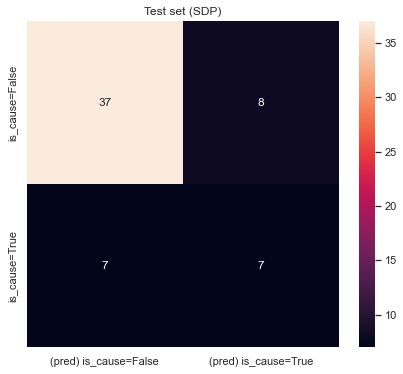

In [59]:
import seaborn as sns
from sklearn.metrics import confusion_matrix


def evaluate_class(y, pred, class_name, title):
    print(f"accuracy: {accuracy_score(y, pred)}")
    
    conf_mat = confusion_matrix(y, pred)
    y_tick_labels = [f'{class_name}=False', f'{class_name}=True']
    x_tick_labels = ['(pred) ' + l for l in y_tick_labels]
    sns.set(rc={'figure.figsize':(7, 6)})
    sns.heatmap(conf_mat, xticklabels=x_tick_labels, yticklabels=y_tick_labels, annot=True, fmt='.3g'
        ).set(title=title)


evaluate_class(y_test.values[:, 0], pred_test[:, 0], 'is_cause', 'Test set (SDP)')

accuracy: 0.6949152542372882


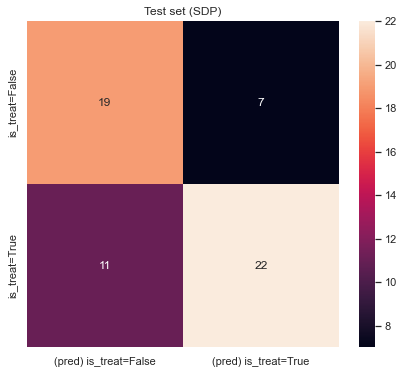

In [60]:
evaluate_class(y_test.values[:, 1], pred_test[:, 1], 'is_treat', 'Test set (SDP)')

In [ ]:
# Where both are TRUE we could take the highest probability one, because we know that the double positive case is extremely unlikely
# It happens once though in the full dataset

In [61]:
# Both predicted rightly
pd.set_option('display.max_colwidth', None)
print(f'len(y_test): {len(y_test)}')
cols = ['term1', 'term2', 'prp_sent', 'sdp_joined', 'is_cause', 'is_treat']
df[cols].iloc[y_test.index][(pred_test == y_test).all(axis=1)].sort_index()

len(y_test): 59


,term1,term2,prp_sent,sdp_joined,is_cause,is_treat
17,coffee,metabolic syndrome,"further, waste products from tropical fruits including mangosteen rind, influence pulp and spent influence grounds provide further options to reduce condition.","influence pulp rind , provide option reduce condition",0,1
41,flour dust,respiratory diseases,"for decades, occupational exposure to influence has been linked to a range of condition, including occupational asthma, thought to result from exposure to fungi present in the flour.",influence to range of condition,1,0
47,dairy products,bone diseases,"however, milk is a food of high nutritional value, and complete exclusion of influence may favor the development of condition such as osteopenia and osteoporosis.",influence of condition,0,1
49,taraxacum officinale,inflammatory diseases,"influence (l.), commonly called dandelion has been used for centuries as a natural medicine to treat condition including some metabolic alterations associated with obesity.",influence use treat condition,0,1
59,extra-virgin olive oil,malignancies,"epidemiological studies have compellingly documented the ability of the mediterranean diet rich in influence to reduce the incidence of certain condition, and cardiovascular diseases, and slow the alzheimer's disease progression.",influence in rich diet of condition,0,1
65,labiatae,cardiovascular diseases,"use of influence as food or food additives (such as spices) may prevent risk of condition, diabetes and cancer.",influence of condition,0,1
90,fermented foods,gut dysbiosis,"regular consumption of influence (e.g., kimchi, kefir, etc.) may represent a potential avenue to counter the proinflammatory effects of condition.",influence of condition,0,1
92,fruits,degenerative diseases,"several studies have shown that a high consumption of vegetables and influence is consistently associated with a low risk of oxidative stress-induced diseases, which includes some condition such as amyotrophic lateral sclerosis, alzheimer and parkinson.",influence associate consumption of disease include condition,0,1
111,beef,bovine respiratory disease,condition (brd) is a major cause of morbidity and mortality in influence cattle.,influence cattle in morbidity of cause be condition,0,0
120,licorice,neurodegenerative diseases,"extensive research over the last 10 years has indicated that nutraceuticals derived from such spices as turmeric, red pepper, black pepper, influence, clove, ginger, garlic, coriander, and cinnamon target inflammatory pathways, thereby may prevent condition.","influence , prevent condition",0,1


In [62]:
df[cols].iloc[y_test.index][~(pred_test == y_test).all(axis=1)]# At least one predicted wrongly
df[cols].iloc[y_test.index][~(pred_test == y_test).all(axis=1)].assign(
    pred_is_cause=pred_test[~(pred_test == y_test).all(axis=1).values, 0],
    pred_is_treat=pred_test[~(pred_test == y_test).all(axis=1).values, 1]
).sort_index()

,term1,term2,prp_sent,sdp_joined,is_cause,is_treat,pred_is_cause,pred_is_treat
0,bombax ceiba l. (bombacaceae) fruits,urinary stones,"interestingly, many indian tribes use influence as a traditional medicine for the treatment of condition.",influence use as medicine for treatment of condition,0,1,1,1
13,excessive consumption of red meat,coronary heart diseases,influence is associated with various diseases including condition and cancer.,influence associate with disease include condition,1,0,0,0
23,excessive sugar consumption,metabolic diseases,"since influence has been related to the development of chronic condition prevalent in the western world, the use of sweeteners has gradually increased worldwide over the last few years.",influence relate to development of prevalent condition,0,1,1,1
66,meat,coronary heart disease,"regular intake of foods rich in saturated fats, such as influence and certain dairy products, raises the risk of condition, especially in smokers.",influence as fat in risk of condition,1,0,0,1
88,3-hydroxyphenylpropionic acid,diabetes,"epicatechin (ec) and main colonic phenolic acids derived from flavonoid intake, such as 2,3-dihydroxybenzoic acid (dhba), 3,4-dihydroxyphenylacetic acid (dhpaa) and influence (hppa), have been suggested to exert beneficial effects in condition.",influence acid epicatechin suggest exert in condition,0,1,0,0
107,tasmanian atlantic salmon (salmo salar),viral diseases,the influence aquaculture industry had remained relatively free of major condition until the recent emergence of pilchard orthomyxovirus (pomv).,influence industry the emergence of condition,0,0,0,1
132,hard water,atopic dermatitis,"this review summarizes the mechanism and effects of dead sea salt, influence, commercial baby cleansers, oatmeal, rice, and natural oils as bathing additives for the treatment of condition.",influence salt of condition,0,1,0,0
159,olives,inflammation,"consumption of influence (olea europaea l.), including table influence and oil, is associated with low incidence of condition-related diseases.",influence of disease relate condition,0,1,0,0
187,noni fruit juice,rheumatoid arthritis,"however, the validity of influence as a treatment for condition (ra), an autoimmune disorder, has not been confirmed yet.",influence of validity as treatment for condition,0,0,0,1
218,malnutrition,cardiovascular disease,"influence is a condition most commonly arising from the inadequate consumption of nutrients necessary to maintain physiological health and is associated with the development of condition, osteoporosis, and sarcopenia.",influence be and osteoporosis condition,1,0,0,1


## Full sentence

In [63]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, KFold, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import confusion_matrix, make_scorer


np.random.seed(1)

X_train, X_test, y_train, y_test = train_test_split(sent_features, labels, test_size=0.1, shuffle=True, random_state=1)

param_grid = {
    'svc__estimator__C': [0.01, 0.1, 1]
}

pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('svc', MultiOutputClassifier(LinearSVC()))
])

gscv = GridSearchCV(
    pipe, param_grid,
    cv=KFold(n_splits=10, shuffle=True, random_state=1), n_jobs=15, verbose=3
)

gscv.fit(X_train, y_train)
gscv.score(X_test, y_test)

Fitting 10 folds for each of 3 candidates, totalling 30 fits


0.6610169491525424

In [64]:
joblib.dump(gscv, Path('../data/milestone3/gscv_sent.pkl'), compress=5)

print("Best parameters:", gscv.best_params_)
print("Best score:", gscv.best_score_)

Best parameters: {'svc__estimator__C': 0.01}
Best score: 0.7049709724238026


In [65]:
#!pip install seaborn
import seaborn as sns
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score


pred_test = gscv.predict(X_test)

print(f"accuracy: {accuracy_score(y_test, pred_test)}")


accuracy: 0.6610169491525424


In [66]:
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')


print('Test set (full sentence)')
print(classification_report(y_test, pred_test, target_names=['is_cause', 'is_treat']))

Test set (full sentence)
              precision    recall  f1-score   support

    is_cause       0.57      0.86      0.69        14
    is_treat       0.86      0.76      0.81        33

   micro avg       0.74      0.79      0.76        47
   macro avg       0.72      0.81      0.75        47
weighted avg       0.78      0.79      0.77        47
 samples avg       0.58      0.63      0.60        47



accuracy: 0.8135593220338984


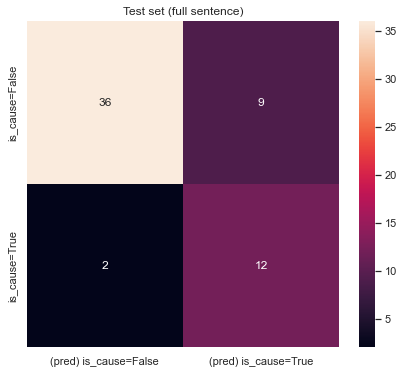

In [67]:
evaluate_class(y_test.values[:, 0], pred_test[:, 0], 'is_cause', 'Test set (full sentence)')

accuracy: 0.7966101694915254


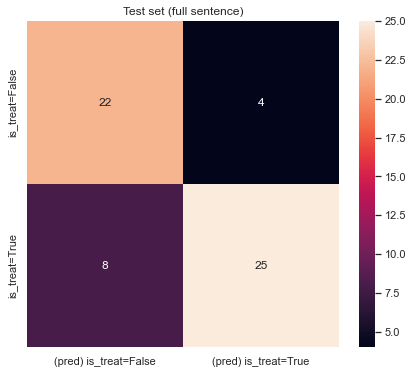

In [68]:
evaluate_class(y_test.values[:, 1], pred_test[:, 1], 'is_treat', 'Test set (full sentence)')

In [69]:
# Both predicted rightly
pd.set_option('display.max_colwidth', None)
print(f'len(y_test): {len(y_test)}')
cols = ['term1', 'term2', 'prp_sent', 'sdp_joined', 'is_cause', 'is_treat']
df[cols].iloc[y_test.index][(pred_test == y_test).all(axis=1)].sort_index()

len(y_test): 59


,term1,term2,prp_sent,sdp_joined,is_cause,is_treat
0,bombax ceiba l. (bombacaceae) fruits,urinary stones,"interestingly, many indian tribes use influence as a traditional medicine for the treatment of condition.",influence use as medicine for treatment of condition,0,1
17,coffee,metabolic syndrome,"further, waste products from tropical fruits including mangosteen rind, influence pulp and spent influence grounds provide further options to reduce condition.","influence pulp rind , provide option reduce condition",0,1
41,flour dust,respiratory diseases,"for decades, occupational exposure to influence has been linked to a range of condition, including occupational asthma, thought to result from exposure to fungi present in the flour.",influence to range of condition,1,0
49,taraxacum officinale,inflammatory diseases,"influence (l.), commonly called dandelion has been used for centuries as a natural medicine to treat condition including some metabolic alterations associated with obesity.",influence use treat condition,0,1
59,extra-virgin olive oil,malignancies,"epidemiological studies have compellingly documented the ability of the mediterranean diet rich in influence to reduce the incidence of certain condition, and cardiovascular diseases, and slow the alzheimer's disease progression.",influence in rich diet of condition,0,1
66,meat,coronary heart disease,"regular intake of foods rich in saturated fats, such as influence and certain dairy products, raises the risk of condition, especially in smokers.",influence as fat in risk of condition,1,0
88,3-hydroxyphenylpropionic acid,diabetes,"epicatechin (ec) and main colonic phenolic acids derived from flavonoid intake, such as 2,3-dihydroxybenzoic acid (dhba), 3,4-dihydroxyphenylacetic acid (dhpaa) and influence (hppa), have been suggested to exert beneficial effects in condition.",influence acid epicatechin suggest exert in condition,0,1
90,fermented foods,gut dysbiosis,"regular consumption of influence (e.g., kimchi, kefir, etc.) may represent a potential avenue to counter the proinflammatory effects of condition.",influence of condition,0,1
92,fruits,degenerative diseases,"several studies have shown that a high consumption of vegetables and influence is consistently associated with a low risk of oxidative stress-induced diseases, which includes some condition such as amyotrophic lateral sclerosis, alzheimer and parkinson.",influence associate consumption of disease include condition,0,1
111,beef,bovine respiratory disease,condition (brd) is a major cause of morbidity and mortality in influence cattle.,influence cattle in morbidity of cause be condition,0,0


In [70]:
# At least one predicted wrongly
df[cols].iloc[y_test.index][~(pred_test == y_test).all(axis=1)].assign(
    pred_is_cause=pred_test[~(pred_test == y_test).all(axis=1).values, 0],
    pred_is_treat=pred_test[~(pred_test == y_test).all(axis=1).values, 1]
).sort_index()

,term1,term2,prp_sent,sdp_joined,is_cause,is_treat,pred_is_cause,pred_is_treat
13,excessive consumption of red meat,coronary heart diseases,influence is associated with various diseases including condition and cancer.,influence associate with disease include condition,1,0,1,1
23,excessive sugar consumption,metabolic diseases,"since influence has been related to the development of chronic condition prevalent in the western world, the use of sweeteners has gradually increased worldwide over the last few years.",influence relate to development of prevalent condition,0,1,1,0
47,dairy products,bone diseases,"however, milk is a food of high nutritional value, and complete exclusion of influence may favor the development of condition such as osteopenia and osteoporosis.",influence of condition,0,1,1,0
65,labiatae,cardiovascular diseases,"use of influence as food or food additives (such as spices) may prevent risk of condition, diabetes and cancer.",influence of condition,0,1,1,1
107,tasmanian atlantic salmon (salmo salar),viral diseases,the influence aquaculture industry had remained relatively free of major condition until the recent emergence of pilchard orthomyxovirus (pomv).,influence industry the emergence of condition,0,0,0,1
132,hard water,atopic dermatitis,"this review summarizes the mechanism and effects of dead sea salt, influence, commercial baby cleansers, oatmeal, rice, and natural oils as bathing additives for the treatment of condition.",influence salt of condition,0,1,0,0
135,whey protein,lipemia,"recently, we demonstrated that influence (wp) combined with low dietary fiber improved condition, a risk factor for cardiovascular disease in subjects with abdominal obesity.","influence demonstrate , condition",0,1,1,0
173,certain foods,obesity,"portion sizes for influence have been increasing dramatically in recent years alongside condition rates, concurring with the phenomenon of the portion size effect (more is consumed when more is offered).",influence for size increase in year alongside rate condition,1,0,0,0
179,eicosapentaenoic acid,alzheimer's disease,"abundant studies have highlighted the protective effects of docosahexaenoic acid (dha), in the form of glycerolipids (glycerophosphatides and triglycerides) and dha-ethyl esters (dha-ee) in condition (ad); however, influence (epa) has rarely been implicated.",influence epa ( condition,0,0,0,1
189,dark chocolate,t2d,"while it could be suggested that daily consumption of flavanols from cocoa or influence would constitute a potential preventive tool useful for the nutritional management of condition, this recommendation should be cautious since most of commercially available soluble cocoa products or chocolates contain low amount of flavanols and are rich in sugar and calories that may aggravate glycaemic control in condition patients.",influence cocoa product of condition,0,1,0,0


In [71]:
df[cols].iloc[y_test.index][~(pred_test == y_test).all(axis=1)].assign(
    pred_is_cause=pred_test[~(pred_test == y_test).all(axis=1).values, 0],
    pred_is_treat=pred_test[~(pred_test == y_test).all(axis=1).values, 1]
).iloc[1].to_dict()

{'term1': 'milk',
 'term2': 'fracture',
 'prp_sent': 'in adult caucasian women, daily intake of 200-250 ml of influence is associated with a reduction in condition risk of 5 % or higher.',
 'sdp_joined': 'influence of risk condition',
 'is_cause': 0,
 'is_treat': 1,
 'pred_is_cause': 1,
 'pred_is_treat': 1}

## Interpretation of results

SDP should more robust, because it seems the CLS embedding contains an excellent understanding of which words are in the input and SDP has lesser occurrence of other potentially distracting words. The CLS embedding at least is like a better BOW, maybe because it understands individual words and their function in the sentence better. Judging by the good performance compared to our NaiveBayes BoW baseline, it seems to even understand the order and context of words, but at least not in the context of our replacement terms, which BERT was not trained with. It probably would not do better without the replacement either, because confusion arises from the predicted relation being true for some entities in the sentence, just not for our candidates.

For example in:
```python
 'term1': 'chicken',
 'term2': 'infectious bronchitis virus',
 'prp_sent': 'term2 (ibv), a gamma-coronavirus, causes infectious bronchitis (ib), a major respiratory disease of term1.',
 'sdp_joined': 'term1 of disease bronchitis cause term2',
 'is_cause': 0,
 'is_treat': 0,
 'pred_is_cause': 1,
 'pred_is_treat': 0
```

```python
 'term1': 'milk',
 'term2': 'fracture',
 'prp_sent': 'in adult caucasian women, daily intake of 200-250 ml of term1 is associated with a reduction in term2 risk of 5 % or higher.',
 'sdp_joined': 'term1 of risk term2',
 'is_cause': 0,
 'is_treat': 1,
 'pred_is_cause': 1,
 'pred_is_treat': 1
```

It understands that something is causing something bad, but does not understand that there still is no direct relation between the terms. But for 2 other candidates like 'gamma-coronavirus' and 'infectious bronchitis (ib)' the prediction would be correct. In this case it actually concerns both the full sentences and the SDP, but in general it should mostly concern the full sentences.

We hope to better this with finetuning the model on our classification task. Let us see if it can learn the relation of our replacement terms. The hypothesis for the next step is that SDP underperforms full sentence inputs. We expect a per class accuracy of 95%.


# Finetuned BERT with classification head

In [72]:
from pathlib import Path
import pandas as pd


df = pd.read_csv(Path('../data/milestone3/preprocessed.csv'), sep=';')
df = df[df['source'] == 'FoodDisease']
# Try trick because model does not get to seem to get the directional order of 'term1'/'term2', use 'influence'/'condition' instead because influence causes/treats a condition
df['prp_sent'] = df['prp_sent'].apply(lambda x: x.replace('term1', 'influence'). replace('term2', 'condition'))
sent_features = df['prp_sent']
sdp_features = df['sdp_joined']
# Only food disease because CrowdTruth is too bad quality
labels = df[['is_cause', 'is_treat']]
df

,term1,term2,sentence,is_cause,is_treat,source,prp_sent,sdp,sdp_joined
0,bombax ceiba l. (bombacaceae) fruits,urinary stones,"interestingly, many indian tribes use bombax ceiba l. (bombacaceae) fruits as a traditional medicine for the treatment of urinary stones.",0,1,FoodDisease,"interestingly, many indian tribes use influence as a traditional medicine for the treatment of condition.","['term1', 'use', 'as', 'medicine', 'for', 'treatment', 'of', 'term2']",term1 use as medicine for treatment of term2
1,ultra-processed food,obesity,"ultra-processed food consumption has been associated with several health outcomes such as obesity, hypertension, cardiovascular disease and cancer.",1,0,FoodDisease,"influence consumption has been associated with several health outcomes such as condition, hypertension, cardiovascular disease and cancer.","['term1', 'consumption', 'associate', 'with', 'outcome', 'as', 'term2']",term1 consumption associate with outcome as term2
2,salt,osteoporosis,"salt has notoriously been blamed for causing an increase in the urinary excretion of calcium, and thus is a considered a risk factor for osteoporosis.",1,0,FoodDisease,"influence has notoriously been blamed for causing an increase in the urinary excretion of calcium, and thus is a considered a risk factor for condition.","['term1', 'blame', 'for', 'term2']",term1 blame for term2
3,broiler chicken,footpad dermatitis,"in broiler chicken flocks when animal-based measures related to footpad dermatitis, hock burns, body lesions and arthritis are identified under commercial conditions (high density).",0,0,FoodDisease,"in influence flocks when animal-based measures related to condition, hock burns, body lesions and arthritis are identified under commercial conditions (high density).","['term1', 'flock', 'in', 'identify', 'burn', ',', 'term2']","term1 flock in identify burn , term2"
4,sfp,diabetes,"in short, this study demonstrated that sfp could be developed as functional foods or pharmaceutical supplements for the prevention or mitigation of diabetes and its complications.",0,1,FoodDisease,"in short, this study demonstrated that influence could be developed as functional foods or pharmaceutical supplements for the prevention or mitigation of condition and its complications.","['term1', 'develop', 'as', 'food', 'or', 'prevention', 'of', 'term2']",term1 develop as food or prevention of term2
...,...,...,...,...,...,...,...,...,...
583,nuts,atherosclerosis,"thus, the inclusion of food sources of dietary antioxidants, such as different kinds of nuts, may improve biomarkers related to oxidative stress, contributing to a possible reduction in atherosclerosis progression.",0,1,FoodDisease,"thus, the inclusion of food sources of dietary antioxidants, such as different kinds of influence, may improve biomarkers related to oxidative stress, contributing to a possible reduction in condition progression.","['term1', 'of', 'inclusion', 'improve', 'contribute', 'to', 'reduction', 'in', 'progression', 'term2']",term1 of inclusion improve contribute to reduction in progression term2
584,persea americana,wilting,"glasshouse pathogenicity tests with 'reed' avocado (persea americana) seedlings confirmed that calonectria ilicicola is a severe pathogen of avocado, causing stunting, wilting, and seedling death within 5 weeks of inoculation.",0,0,FoodDisease,"glasshouse pathogenicity tests with 'reed' avocado (influence) seedlings confirmed that calonectria ilicicola is a severe pathogen of avocado, causing stunting, condition, and seedling death within 5 weeks of inoculation.","['term1', 'seedling', 'confirm', 'be', 'cause', 'stunt', 'term2']",term1 seedling confirm be cause stunt term2
585,apple juice,asthma,"intake of beverages with excess free fructose (eff), including apple juice, and hfcs sweetened fruit drinks and soft drinks, has been associated with asthma in children.",1,0,FoodDisease,"intake of beverages with excess free fructose (eff), including influence, and hfcs sweetene

## Huggingface BertForSequenceClassification

In [73]:
# https://huggingface.co/docs/transformers/training

from pathlib import Path
import pandas as pd
import numpy as np
from transformers import AutoModelForSequenceClassification, AutoTokenizer, BertForSequenceClassification, BertTokenizer
import evaluate
from datasets import Dataset
import torch
from sklearn.model_selection import train_test_split

torch.manual_seed(1)
np.random.seed(1)

model = BertForSequenceClassification.from_pretrained(
    'emilyalsentzer/Bio_ClinicalBERT', num_labels=2, problem_type='multi_label_classification'
)
# for param in model.bert.parameters():
#     param.requires_grad = True
tokenizer = BertTokenizer.from_pretrained('emilyalsentzer/Bio_ClinicalBERT')
# bert = AutoModel.from_pretrained('emilyalsentzer/Bio_ClinicalBERT')

X_train, X_test, y_train, y_test = train_test_split(sent_features, labels.values, test_size=0.1, shuffle=True, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, shuffle=True, random_state=1)

X_train_tokens = tokenizer(list(X_train), truncation=True, padding=True)
X_val_tokens = tokenizer(list(X_val), truncation=True, padding=True)
X_test_tokens = tokenizer(list(X_test), truncation=True, padding=True)


class MedDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels.astype('float')

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)


train_dataset = MedDataset(X_train_tokens, y_train)
val_dataset = MedDataset(X_val_tokens, y_val)
test_dataset = MedDataset(X_test_tokens, y_test)

loading configuration file https://huggingface.co/emilyalsentzer/Bio_ClinicalBERT/resolve/main/config.json from cache at C:\Users\alexs/.cache\huggingface\transformers\dc6d60ebe42d83e1479ce0d473758bb3586763ff6c4c814bda5321acf856bd64.b74d0770929e519c6d193d16b6874051ae549f5c8c228903a48e59d36260466b
Model config BertConfig {
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "problem_type": "multi_label_classification",
  "transformers_version": "4.21.0",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 28996
}

loading weights file https://huggingface.co/emilyalsentzer/Bio_ClinicalBERT/resolve/main/pytorch_model.bin from cach

In [74]:
from transformers import Trainer, TrainingArguments, EarlyStoppingCallback
from sklearn.metrics import f1_score, accuracy_score


training_args = TrainingArguments(
    output_dir='../data/milestone3/model/',
    num_train_epochs=50,
    per_device_train_batch_size=32,
    per_device_eval_batch_size=64,
    learning_rate=1e-4,
    weight_decay=1e-2,
    lr_scheduler_type='linear',
    warmup_steps=500,
    logging_dir='../data/milestone3/model/logs/',
    logging_steps=10,
    load_best_model_at_end=True,
    evaluation_strategy='epoch',
    save_strategy='epoch'
)

accuracy_metric = evaluate.load('accuracy')
f1_metric = evaluate.load('f1')
def compute_metrics(eval_pred):
    logits, labels = eval_pred
    probs = torch.sigmoid(torch.Tensor(logits))
    predictions = np.zeros(probs.shape)
    positive_mask = probs >= 0.5
    predictions[positive_mask] = 1
    predictions[~positive_mask] = 0
    result = {}
    label_cols = ['is_cause', 'is_treat']
    for i, l in enumerate(label_cols):
        result[f'accuracy {l}'] = accuracy_metric.compute(predictions=predictions[:, i], references=labels[:, i])['accuracy']
        result[f'f1 {l}'] = f1_metric.compute(predictions=predictions[:, i], references=labels[:, i])['f1']
    result[f'accuracy macro'] = sum([result[f'accuracy {l}'] for l in label_cols]) / len(label_cols)
    result['accuracy'] = accuracy_score(labels, predictions)
    result['f1_micro'] = f1_score(y_true=labels, y_pred=predictions, average='micro')
    return result


trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    compute_metrics=compute_metrics,
    callbacks = [EarlyStoppingCallback(early_stopping_patience=5)]
)

trainer.train()

PyTorch: setting up devices
The default value for the training argument `--report_to` will change in v5 (from all installed integrations to none). In v5, you will need to use `--report_to all` to get the same behavior as now. You should start updating your code and make this info disappear :-).
***** Running training *****
  Num examples = 476
  Num Epochs = 50
  Instantaneous batch size per device = 32
  Total train batch size (w. parallel, distributed & accumulation) = 32
  Gradient Accumulation steps = 1
  Total optimization steps = 750


  0%|          | 0/750 [00:00<?, ?it/s]

{'loss': 0.8093, 'learning_rate': 2.0000000000000003e-06, 'epoch': 0.67}


***** Running Evaluation *****
  Num examples = 53
  Batch size = 64


  0%|          | 0/1 [00:00<?, ?it/s]

Saving model checkpoint to ../data/milestone3/model/checkpoint-15
Configuration saved in ../data/milestone3/model/checkpoint-15\config.json


{'eval_loss': 0.7786994950037517, 'eval_accuracy is_cause': 0.16981132075471697, 'eval_f1 is_cause': 0.2903225806451613, 'eval_accuracy is_treat': 0.5660377358490566, 'eval_f1 is_treat': 0.7088607594936709, 'eval_accuracy macro': 0.36792452830188677, 'eval_accuracy': 0.0, 'eval_f1_micro': 0.5248226950354611, 'eval_runtime': 0.1224, 'eval_samples_per_second': 433.003, 'eval_steps_per_second': 8.17, 'epoch': 1.0}


Model weights saved in ../data/milestone3/model/checkpoint-15\pytorch_model.bin


{'loss': 0.7829, 'learning_rate': 4.000000000000001e-06, 'epoch': 1.33}


***** Running Evaluation *****
  Num examples = 53
  Batch size = 64


{'loss': 0.7105, 'learning_rate': 6e-06, 'epoch': 2.0}


  0%|          | 0/1 [00:00<?, ?it/s]

Saving model checkpoint to ../data/milestone3/model/checkpoint-30
Configuration saved in ../data/milestone3/model/checkpoint-30\config.json


{'eval_loss': 0.6520817818576999, 'eval_accuracy is_cause': 0.8113207547169812, 'eval_f1 is_cause': 0.2857142857142857, 'eval_accuracy is_treat': 0.5471698113207547, 'eval_f1 is_treat': 0.7073170731707317, 'eval_accuracy macro': 0.679245283018868, 'eval_accuracy': 0.5094339622641509, 'eval_f1_micro': 0.6458333333333334, 'eval_runtime': 0.1303, 'eval_samples_per_second': 406.876, 'eval_steps_per_second': 7.677, 'epoch': 2.0}


Model weights saved in ../data/milestone3/model/checkpoint-30\pytorch_model.bin


{'loss': 0.6391, 'learning_rate': 8.000000000000001e-06, 'epoch': 2.67}


***** Running Evaluation *****
  Num examples = 53
  Batch size = 64


  0%|          | 0/1 [00:00<?, ?it/s]

Saving model checkpoint to ../data/milestone3/model/checkpoint-45
Configuration saved in ../data/milestone3/model/checkpoint-45\config.json


{'eval_loss': 0.5726128948746987, 'eval_accuracy is_cause': 0.8301886792452831, 'eval_f1 is_cause': 0.0, 'eval_accuracy is_treat': 0.4716981132075472, 'eval_f1 is_treat': 0.06666666666666667, 'eval_accuracy macro': 0.6509433962264151, 'eval_accuracy': 0.3018867924528302, 'eval_f1_micro': 0.05128205128205127, 'eval_runtime': 0.1282, 'eval_samples_per_second': 413.266, 'eval_steps_per_second': 7.797, 'epoch': 3.0}


Model weights saved in ../data/milestone3/model/checkpoint-45\pytorch_model.bin


{'loss': 0.605, 'learning_rate': 1e-05, 'epoch': 3.33}


***** Running Evaluation *****
  Num examples = 53
  Batch size = 64


{'loss': 0.6134, 'learning_rate': 1.2e-05, 'epoch': 4.0}


  0%|          | 0/1 [00:00<?, ?it/s]

Saving model checkpoint to ../data/milestone3/model/checkpoint-60
Configuration saved in ../data/milestone3/model/checkpoint-60\config.json


{'eval_loss': 0.5483825332572999, 'eval_accuracy is_cause': 0.8301886792452831, 'eval_f1 is_cause': 0.0, 'eval_accuracy is_treat': 0.5471698113207547, 'eval_f1 is_treat': 0.7073170731707317, 'eval_accuracy macro': 0.6886792452830188, 'eval_accuracy': 0.5471698113207547, 'eval_f1_micro': 0.6373626373626373, 'eval_runtime': 0.1303, 'eval_samples_per_second': 406.799, 'eval_steps_per_second': 7.675, 'epoch': 4.0}


Model weights saved in ../data/milestone3/model/checkpoint-60\pytorch_model.bin


{'loss': 0.5818, 'learning_rate': 1.4000000000000001e-05, 'epoch': 4.67}


***** Running Evaluation *****
  Num examples = 53
  Batch size = 64


  0%|          | 0/1 [00:00<?, ?it/s]

Saving model checkpoint to ../data/milestone3/model/checkpoint-75
Configuration saved in ../data/milestone3/model/checkpoint-75\config.json


{'eval_loss': 0.481775198764396, 'eval_accuracy is_cause': 0.8301886792452831, 'eval_f1 is_cause': 0.0, 'eval_accuracy is_treat': 0.7924528301886793, 'eval_f1 is_treat': 0.835820895522388, 'eval_accuracy macro': 0.8113207547169812, 'eval_accuracy': 0.7358490566037735, 'eval_f1_micro': 0.7368421052631579, 'eval_runtime': 0.1363, 'eval_samples_per_second': 388.907, 'eval_steps_per_second': 7.338, 'epoch': 5.0}


Model weights saved in ../data/milestone3/model/checkpoint-75\pytorch_model.bin


{'loss': 0.5151, 'learning_rate': 1.6000000000000003e-05, 'epoch': 5.33}


***** Running Evaluation *****
  Num examples = 53
  Batch size = 64


{'loss': 0.3946, 'learning_rate': 1.8e-05, 'epoch': 6.0}


  0%|          | 0/1 [00:00<?, ?it/s]

Saving model checkpoint to ../data/milestone3/model/checkpoint-90
Configuration saved in ../data/milestone3/model/checkpoint-90\config.json


{'eval_loss': 0.3340481219567219, 'eval_accuracy is_cause': 0.9245283018867925, 'eval_f1 is_cause': 0.8181818181818181, 'eval_accuracy is_treat': 0.8867924528301887, 'eval_f1 is_treat': 0.8928571428571429, 'eval_accuracy macro': 0.9056603773584906, 'eval_accuracy': 0.8301886792452831, 'eval_f1_micro': 0.8717948717948718, 'eval_runtime': 0.1288, 'eval_samples_per_second': 411.553, 'eval_steps_per_second': 7.765, 'epoch': 6.0}


Model weights saved in ../data/milestone3/model/checkpoint-90\pytorch_model.bin


{'loss': 0.2855, 'learning_rate': 2e-05, 'epoch': 6.67}


***** Running Evaluation *****
  Num examples = 53
  Batch size = 64


  0%|          | 0/1 [00:00<?, ?it/s]

Saving model checkpoint to ../data/milestone3/model/checkpoint-105
Configuration saved in ../data/milestone3/model/checkpoint-105\config.json


{'eval_loss': 0.23297863404424687, 'eval_accuracy is_cause': 0.8867924528301887, 'eval_f1 is_cause': 0.7499999999999999, 'eval_accuracy is_treat': 0.8867924528301887, 'eval_f1 is_treat': 0.9, 'eval_accuracy macro': 0.8867924528301887, 'eval_accuracy': 0.7735849056603774, 'eval_f1_micro': 0.8571428571428571, 'eval_runtime': 0.1402, 'eval_samples_per_second': 377.976, 'eval_steps_per_second': 7.132, 'epoch': 7.0}


Model weights saved in ../data/milestone3/model/checkpoint-105\pytorch_model.bin


{'loss': 0.2109, 'learning_rate': 2.2000000000000003e-05, 'epoch': 7.33}


***** Running Evaluation *****
  Num examples = 53
  Batch size = 64


{'loss': 0.1725, 'learning_rate': 2.4e-05, 'epoch': 8.0}


  0%|          | 0/1 [00:00<?, ?it/s]

Saving model checkpoint to ../data/milestone3/model/checkpoint-120
Configuration saved in ../data/milestone3/model/checkpoint-120\config.json


{'eval_loss': 0.1859565176122453, 'eval_accuracy is_cause': 0.9811320754716981, 'eval_f1 is_cause': 0.9473684210526316, 'eval_accuracy is_treat': 0.9056603773584906, 'eval_f1 is_treat': 0.9180327868852458, 'eval_accuracy macro': 0.9433962264150944, 'eval_accuracy': 0.8867924528301887, 'eval_f1_micro': 0.925, 'eval_runtime': 0.1303, 'eval_samples_per_second': 406.908, 'eval_steps_per_second': 7.678, 'epoch': 8.0}


Model weights saved in ../data/milestone3/model/checkpoint-120\pytorch_model.bin


{'loss': 0.098, 'learning_rate': 2.6000000000000002e-05, 'epoch': 8.67}


***** Running Evaluation *****
  Num examples = 53
  Batch size = 64


  0%|          | 0/1 [00:00<?, ?it/s]

Saving model checkpoint to ../data/milestone3/model/checkpoint-135
Configuration saved in ../data/milestone3/model/checkpoint-135\config.json


{'eval_loss': 0.19682445790056347, 'eval_accuracy is_cause': 0.9622641509433962, 'eval_f1 is_cause': 0.9, 'eval_accuracy is_treat': 0.9056603773584906, 'eval_f1 is_treat': 0.912280701754386, 'eval_accuracy macro': 0.9339622641509434, 'eval_accuracy': 0.8679245283018868, 'eval_f1_micro': 0.9090909090909091, 'eval_runtime': 0.1307, 'eval_samples_per_second': 405.526, 'eval_steps_per_second': 7.651, 'epoch': 9.0}


Model weights saved in ../data/milestone3/model/checkpoint-135\pytorch_model.bin


{'loss': 0.0644, 'learning_rate': 2.8000000000000003e-05, 'epoch': 9.33}


***** Running Evaluation *****
  Num examples = 53
  Batch size = 64


{'loss': 0.0449, 'learning_rate': 3e-05, 'epoch': 10.0}


  0%|          | 0/1 [00:00<?, ?it/s]

Saving model checkpoint to ../data/milestone3/model/checkpoint-150
Configuration saved in ../data/milestone3/model/checkpoint-150\config.json


{'eval_loss': 0.22144270459638096, 'eval_accuracy is_cause': 0.9433962264150944, 'eval_f1 is_cause': 0.8571428571428571, 'eval_accuracy is_treat': 0.9056603773584906, 'eval_f1 is_treat': 0.9152542372881356, 'eval_accuracy macro': 0.9245283018867925, 'eval_accuracy': 0.8490566037735849, 'eval_f1_micro': 0.9, 'eval_runtime': 0.1333, 'eval_samples_per_second': 397.741, 'eval_steps_per_second': 7.505, 'epoch': 10.0}


Model weights saved in ../data/milestone3/model/checkpoint-150\pytorch_model.bin


{'loss': 0.0334, 'learning_rate': 3.2000000000000005e-05, 'epoch': 10.67}


***** Running Evaluation *****
  Num examples = 53
  Batch size = 64


  0%|          | 0/1 [00:00<?, ?it/s]

Saving model checkpoint to ../data/milestone3/model/checkpoint-165
Configuration saved in ../data/milestone3/model/checkpoint-165\config.json


{'eval_loss': 0.22421943694616675, 'eval_accuracy is_cause': 0.9433962264150944, 'eval_f1 is_cause': 0.8421052631578948, 'eval_accuracy is_treat': 0.9245283018867925, 'eval_f1 is_treat': 0.9333333333333333, 'eval_accuracy macro': 0.9339622641509434, 'eval_accuracy': 0.8679245283018868, 'eval_f1_micro': 0.9113924050632912, 'eval_runtime': 0.1367, 'eval_samples_per_second': 387.619, 'eval_steps_per_second': 7.314, 'epoch': 11.0}


Model weights saved in ../data/milestone3/model/checkpoint-165\pytorch_model.bin


{'loss': 0.022, 'learning_rate': 3.4000000000000007e-05, 'epoch': 11.33}


***** Running Evaluation *****
  Num examples = 53
  Batch size = 64


{'loss': 0.0198, 'learning_rate': 3.6e-05, 'epoch': 12.0}


  0%|          | 0/1 [00:00<?, ?it/s]

Saving model checkpoint to ../data/milestone3/model/checkpoint-180
Configuration saved in ../data/milestone3/model/checkpoint-180\config.json


{'eval_loss': 0.4357917485604905, 'eval_accuracy is_cause': 0.9245283018867925, 'eval_f1 is_cause': 0.8181818181818181, 'eval_accuracy is_treat': 0.8867924528301887, 'eval_f1 is_treat': 0.8928571428571429, 'eval_accuracy macro': 0.9056603773584906, 'eval_accuracy': 0.8301886792452831, 'eval_f1_micro': 0.8717948717948718, 'eval_runtime': 0.1309, 'eval_samples_per_second': 405.041, 'eval_steps_per_second': 7.642, 'epoch': 12.0}


Model weights saved in ../data/milestone3/model/checkpoint-180\pytorch_model.bin


{'loss': 0.0222, 'learning_rate': 3.8e-05, 'epoch': 12.67}


***** Running Evaluation *****
  Num examples = 53
  Batch size = 64


  0%|          | 0/1 [00:00<?, ?it/s]

Saving model checkpoint to ../data/milestone3/model/checkpoint-195
Configuration saved in ../data/milestone3/model/checkpoint-195\config.json


{'eval_loss': 0.19801150988743482, 'eval_accuracy is_cause': 0.9433962264150944, 'eval_f1 is_cause': 0.8421052631578948, 'eval_accuracy is_treat': 0.9245283018867925, 'eval_f1 is_treat': 0.9333333333333333, 'eval_accuracy macro': 0.9339622641509434, 'eval_accuracy': 0.8679245283018868, 'eval_f1_micro': 0.9113924050632912, 'eval_runtime': 0.1382, 'eval_samples_per_second': 383.406, 'eval_steps_per_second': 7.234, 'epoch': 13.0}


Model weights saved in ../data/milestone3/model/checkpoint-195\pytorch_model.bin


Training completed. Do not forget to share your model on huggingface.co/models =)


Loading best model from ../data/milestone3/model/checkpoint-120 (score: 0.1859565176122453).


{'train_runtime': 89.3048, 'train_samples_per_second': 266.503, 'train_steps_per_second': 8.398, 'train_loss': 0.3404141332858648, 'epoch': 13.0}


TrainOutput(global_step=195, training_loss=0.3404141332858648, metrics={'train_runtime': 89.3048, 'train_samples_per_second': 266.503, 'train_steps_per_second': 8.398, 'train_loss': 0.3404141332858648, 'epoch': 13.0})

In [75]:
trainer.evaluate(test_dataset)

***** Running Evaluation *****
  Num examples = 59
  Batch size = 64


  0%|          | 0/1 [00:00<?, ?it/s]

{'eval_loss': 0.259299686052284,
 'eval_accuracy is_cause': 0.9152542372881356,
 'eval_f1 is_cause': 0.8148148148148148,
 'eval_accuracy is_treat': 0.8813559322033898,
 'eval_f1 is_treat': 0.8923076923076922,
 'eval_accuracy macro': 0.8983050847457628,
 'eval_accuracy': 0.8135593220338984,
 'eval_f1_micro': 0.8695652173913044,
 'eval_runtime': 0.4253,
 'eval_samples_per_second': 138.717,
 'eval_steps_per_second': 2.351,
 'epoch': 13.0}

In [76]:
out_test = trainer.predict(test_dataset)
probs = torch.sigmoid(torch.Tensor(out_test[0])) # Predicted logits
pred_test = np.zeros(probs.shape)
positive_mask = probs >= 0.5
pred_test[positive_mask] = 1
pred_test[~positive_mask] = 0

***** Running Prediction *****
  Num examples = 59
  Batch size = 64


  0%|          | 0/1 [00:00<?, ?it/s]

In [77]:
from sklearn.metrics import classification_report, accuracy_score
import warnings
warnings.filterwarnings('ignore')


print(f"accuracy: {accuracy_score(y_test, pred_test)}")
print(classification_report(y_test, pred_test, target_names=['is_cause', 'is_treat']))

accuracy: 0.8135593220338984
              precision    recall  f1-score   support

    is_cause       0.85      0.79      0.81        14
    is_treat       0.91      0.88      0.89        33

   micro avg       0.89      0.85      0.87        47
   macro avg       0.88      0.83      0.85        47
weighted avg       0.89      0.85      0.87        47
 samples avg       0.68      0.68      0.68        47



accuracy: 0.9152542372881356


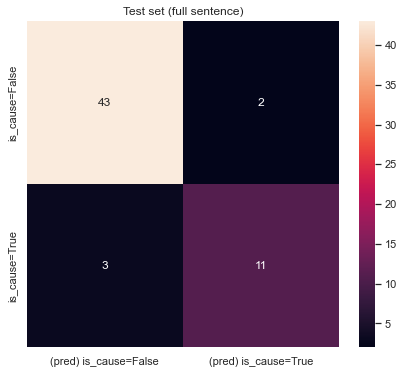

In [78]:
import seaborn as sns
from sklearn.metrics import confusion_matrix


def evaluate_class(y, pred, class_name, title):
    print(f"accuracy: {accuracy_score(y, pred)}")
    
    conf_mat = confusion_matrix(y, pred)
    y_tick_labels = [f'{class_name}=False', f'{class_name}=True']
    x_tick_labels = ['(pred) ' + l for l in y_tick_labels]
    sns.set(rc={'figure.figsize':(7, 6)})
    sns.heatmap(conf_mat, xticklabels=x_tick_labels, yticklabels=y_tick_labels, annot=True, fmt='.3g').set(title=title)


evaluate_class(y_test[:, 0], pred_test[:, 0], 'is_cause', 'Test set (full sentence)')

accuracy: 0.8813559322033898


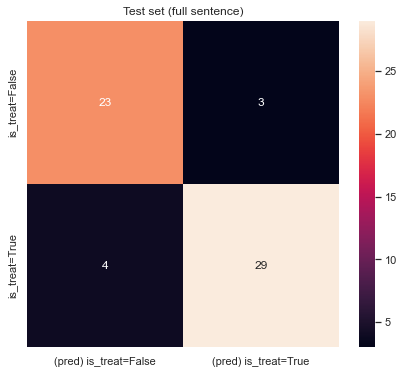

In [79]:
evaluate_class(y_test[:, 1], pred_test[:, 1], 'is_treat', 'Test set (full sentence)')

In [86]:
# Both predicted rightly
pd.set_option('display.max_colwidth', None)
pd.concat([pd.DataFrame(X_test.reset_index()), pd.DataFrame(y_test)], axis=1)[(pred_test == y_test).all(axis=1)].assign(
    pred_is_cause=pred_test[(pred_test == y_test).all(axis=1), 0],
    pred_is_treat=pred_test[(pred_test == y_test).all(axis=1), 1]
).rename({0: 'is_cause', 1: 'is_treat'}, axis=1).set_index('index').sort_index()

,prp_sent,is_cause,is_treat,pred_is_cause,pred_is_treat
index,,,,,
0,"interestingly, many indian tribes use influence as a traditional medicine for the treatment of condition.",0,1,0.0,1.0
13,influence is associated with various diseases including condition and cancer.,1,0,1.0,0.0
17,"further, waste products from tropical fruits including mangosteen rind, influence pulp and spent influence grounds provide further options to reduce condition.",0,1,0.0,1.0
41,"for decades, occupational exposure to influence has been linked to a range of condition, including occupational asthma, thought to result from exposure to fungi present in the flour.",1,0,1.0,0.0
49,"influence (l.), commonly called dandelion has been used for centuries as a natural medicine to treat condition including some metabolic alterations associated with obesity.",0,1,0.0,1.0
59,"epidemiological studies have compellingly documented the ability of the mediterranean diet rich in influence to reduce the incidence of certain condition, and cardiovascular diseases, and slow the alzheimer's disease progression.",0,1,0.0,1.0
65,"use of influence as food or food additives (such as spices) may prevent risk of condition, diabetes and cancer.",0,1,0.0,1.0
66,"regular intake of foods rich in saturated fats, such as influence and certain dairy products, raises the risk of condition, especially in smokers.",1,0,1.0,0.0
88,"epicatechin (ec) and main colonic phenolic acids derived from flavonoid intake, such as 2,3-dihydroxybenzoic acid (dhba), 3,4-dihydroxyphenylacetic acid (dhpaa) and influence (hppa), have been suggested to exert beneficial effects in condition.",0,1,0.0,1.0


In [87]:
# At least one predicted wrongly
pd.concat([pd.DataFrame(X_test.reset_index()), pd.DataFrame(y_test)], axis=1)[~(pred_test == y_test).all(axis=1)].assign(
    pred_is_cause=pred_test[~(pred_test == y_test).all(axis=1), 0],
    pred_is_treat=pred_test[~(pred_test == y_test).all(axis=1), 1]
).rename({0: 'is_cause', 1: 'is_treat'}, axis=1).set_index('index').sort_index()

,prp_sent,is_cause,is_treat,pred_is_cause,pred_is_treat
index,,,,,
23,"since influence has been related to the development of chronic condition prevalent in the western world, the use of sweeteners has gradually increased worldwide over the last few years.",0,1,1.0,0.0
47,"however, milk is a food of high nutritional value, and complete exclusion of influence may favor the development of condition such as osteopenia and osteoporosis.",0,1,0.0,0.0
111,condition (brd) is a major cause of morbidity and mortality in influence cattle.,0,0,1.0,0.0
173,"portion sizes for influence have been increasing dramatically in recent years alongside condition rates, concurring with the phenomenon of the portion size effect (more is consumed when more is offered).",1,0,0.0,0.0
179,"abundant studies have highlighted the protective effects of docosahexaenoic acid (dha), in the form of glycerolipids (glycerophosphatides and triglycerides) and dha-ethyl esters (dha-ee) in condition (ad); however, influence (epa) has rarely been implicated.",0,0,0.0,1.0
187,"however, the validity of influence as a treatment for condition (ra), an autoimmune disorder, has not been confirmed yet.",0,0,0.0,1.0
218,"influence is a condition most commonly arising from the inadequate consumption of nutrients necessary to maintain physiological health and is associated with the development of condition, osteoporosis, and sarcopenia.",1,0,0.0,0.0
409,"in the last decade, several theories investigating the causes of condition have been formulated and a condition or risk factor that can contribute is described by the gut-brain axis hypothesis: stress, influence, and drugs impact altering microbiota composition which contributes to dysbiosis.",1,0,0.0,0.0
535,"although a high intake of plant foods such as fruits, vegetables, whole grains, influence, and legumes has been recommended for condition prevention, it has been unclear what is the optimal amount of intake of these foods and whether specific subtypes are particularly beneficial.",0,1,0.0,0.0


In [ ]:
# Copied from before
# At least one predicted wrongly

,term1,term2,prp_sent,sdp_joined,is_cause,is_treat,pred_is_cause,pred_is_treat
13,excessive consumption of red meat,coronary heart diseases,influence is associated with various diseases including condition and cancer.,influence associate with disease include condition,1,0,1,1
23,excessive sugar consumption,metabolic diseases,"since influence has been related to the development of chronic condition prevalent in the western world, the use of sweeteners has gradually increased worldwide over the last few years.",influence relate to development of prevalent condition,0,1,1,0
47,dairy products,bone diseases,"however, milk is a food of high nutritional value, and complete exclusion of influence may favor the development of condition such as osteopenia and osteoporosis.",influence of condition,0,1,1,0
65,labiatae,cardiovascular diseases,"use of influence as food or food additives (such as spices) may prevent risk of condition, diabetes and cancer.",influence of condition,0,1,1,1
107,tasmanian atlantic salmon (salmo salar),viral diseases,the influence aquaculture industry had remained relatively free of major condition until the recent emergence of pilchard orthomyxovirus (pomv).,influence industry the emergence of condition,0,0,0,1
132,hard water,atopic dermatitis,"this review summarizes the mechanism and effects of dead sea salt, influence, commercial baby cleansers, oatmeal, rice, and natural oils as bathing additives for the treatment of condition.",influence salt of condition,0,1,0,0
135,whey protein,lipemia,"recently, we demonstrated that influence (wp) combined with low dietary fiber improved condition, a risk factor for cardiovascular disease in subjects with abdominal obesity.","influence demonstrate , condition",0,1,1,0
173,certain foods,obesity,"portion sizes for influence have been increasing dramatically in recent years alongside condition rates, concurring with the phenomenon of the portion size effect (more is consumed when more is offered).",influence for size increase in year alongside rate condition,1,0,0,0
179,eicosapentaenoic acid,alzheimer's disease,"abundant studies have highlighted the protective effects of docosahexaenoic acid (dha), in the form of glycerolipids (glycerophosphatides and triglycerides) and dha-ethyl esters (dha-ee) in condition (ad); however, influence (epa) has rarely been implicated.",influence epa ( condition,0,0,0,1
189,dark chocolate,t2d,"while it could be suggested that daily consumption of flavanols from cocoa or influence would constitute a potential preventive tool useful for the nutritional management of condition, this recommendation should be cautious since most of commercially available soluble cocoa products or chocolates contain low amount of flavanols and are rich in sugar and calories that may aggravate glycaemic control in condition patients.",influence cocoa product of condition,0,1,0,0


In [ ]:
del model
del trainer
del train_dataset
del test_dataset
del val_dataset

### TorchLightning BERT CLS Classifier

In [ ]:
from pathlib import Path
import pandas as pd
import numpy as np
from transformers import AutoModel, AutoTokenizer
import evaluate
from datasets import Dataset
import torch
import torch.nn as nn
from sklearn.model_selection import train_test_split


torch.manual_seed(1)
np.random.seed(1)


tokenizer = AutoTokenizer.from_pretrained('emilyalsentzer/Bio_ClinicalBERT')
bert = AutoModel.from_pretrained('emilyalsentzer/Bio_ClinicalBERT')


X_train, X_test, y_train, y_test = train_test_split(sent_features.values, labels.values.astype('float'), test_size=0.1, shuffle=True, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, shuffle=False)

X_train_tokens = tokenizer(list(X_train), truncation=True, padding=True)
X_val_tokens = tokenizer(list(X_val), truncation=True, padding=True)
X_test_tokens = tokenizer(list(X_test), truncation=True, padding=True)


class MedDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        X = [torch.tensor(val[idx]) for key, val in self.encodings.items()][0]
        y = torch.tensor(self.labels[idx])
        return X, y

    def __len__(self):
        return len(self.labels)


train_dataset = MedDataset(X_train_tokens, y_train)
val_dataset = MedDataset(X_val_tokens, y_val)
test_dataset = MedDataset(X_test_tokens, y_test)

Some weights of the model checkpoint at emilyalsentzer/Bio_ClinicalBERT were not used when initializing BertModel: ['cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


In [ ]:
from pathlib import Path

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset
from torch.utils.data import DataLoader

from pytorch_lightning.core.lightning import LightningModule
from pytorch_lightning import Trainer
from pytorch_lightning.callbacks import ModelCheckpoint
from pytorch_lightning.callbacks.early_stopping import EarlyStopping
from pytorch_lightning.loggers import TensorBoardLogger


class TorchModel(LightningModule):
    def __init__(self, learning_rate=1e-05, weight_decay=1e-02) -> None:
        super().__init__()
        self.save_hyperparameters('learning_rate', 'weight_decay')
        self.bert = bert
        for param in self.bert.parameters():
            param.requires_grad = True
        self.classifier = nn.Linear(768, 2)
           
    def forward(self, x):
        x = self.bert(x)[0][:, 0, :]
        x = self.classifier(x)
        return x
    
    def _loss_fn(self, out, y):
        loss = nn.BCEWithLogitsLoss()(out, y)
        return loss
    
    def training_step(self, batch, batch_idx):
        x, y = batch
        out = self(x)
        loss = self._loss_fn(out, y)
        self.log('loss', loss, on_step=True, on_epoch=True, prog_bar=True, logger=True)
        return loss
    
    def validation_step(self, batch, batch_idx):
        x, y = batch
        out = self(x)
        loss = self._loss_fn(out, y)
        self.log('val_loss', loss, on_epoch=True, prog_bar=True, logger=True)

    def test_step(self, batch, batch_idx):
        x, y = batch
        out = self(x)
        loss = self._loss_fn(out, y)
        self.log('test_loss', loss, on_epoch=True, prog_bar=True, logger=True)
    
    def configure_optimizers(self):
        optim = torch.optim.AdamW(self.parameters(), lr=self.hparams.learning_rate, weight_decay=self.hparams.weight_decay)
        return optim
    

class TorchTrainer():
    def __init__(self, model, name, dirpath, dataloaders, max_epochs=30) -> None:
        self.model = model
        self.name = name
        self.dirpath = dirpath
        self.max_epochs = max_epochs
        self.dataloaders = dataloaders

    def run(self):
        logger = TensorBoardLogger(f'{self.dirpath}/tensorboard', name=self.name)
        callbacks = [
            ModelCheckpoint(dirpath=Path(self.dirpath, self.name), monitor='val_loss'),
            EarlyStopping(monitor='val_loss', patience=5, mode='min')]
        trainer = Trainer(logger=logger, callbacks=callbacks, max_epochs=self.max_epochs, gpus=1, num_sanity_val_steps=1)
        trainer.fit(self.model, self.dataloaders['train'], self.dataloaders['val'])
        trainer.test(self.model, self.dataloaders['test'])

        
train_dataloader = DataLoader(train_dataset, batch_size=32, num_workers=0, drop_last=False, pin_memory=True, shuffle=False)
val_dataloader = DataLoader(val_dataset, batch_size=64, num_workers=0, drop_last=False, pin_memory=True, shuffle=False)
test_dataloader = DataLoader(test_dataset, batch_size=64, num_workers=0, drop_last=False, pin_memory=True, shuffle=False)
dataloaders = {'train': train_dataloader, 'val': val_dataloader, 'test': test_dataloader}

model = TorchModel()
trainer = TorchTrainer(model, 'bert_cls', '../data/milestone3/bert_cls/', dataloaders, 50)

In [ ]:
trainer.run()

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
c:\Users\alexs\miniconda3\envs\ds\lib\site-packages\pytorch_lightning\callbacks\model_checkpoint.py:611: UserWarning: Checkpoint directory C:\Users\alexs\Desktop\uni\ws22\natural-language-processing\project-1div7\data\milestone3\bert_cls\bert_cls exists and is not empty.
  rank_zero_warn(f"Checkpoint directory {dirpath} exists and is not empty.")
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name       | Type      | Params
-----------------------------------------
0 | bert       | BertModel | 108 M 
1 | classifier | Linear    | 1.5 K 
-----------------------------------------
108 M     Trainable params
0         Non-trainable params
108 M     Total params
433.247   Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

c:\Users\alexs\miniconda3\envs\ds\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:240: PossibleUserWarning: The dataloader, val_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 32 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(
c:\Users\alexs\miniconda3\envs\ds\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:240: PossibleUserWarning: The dataloader, train_dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 32 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(
c:\Users\alexs\miniconda3\envs\ds\lib\site-packages\pytorch_lightning\trainer\trainer.py:1933: PossibleUserWarning: The number of training batches (14) is smaller than the logging interval Trainer

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
c:\Users\alexs\miniconda3\envs\ds\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:240: PossibleUserWarning: The dataloader, test_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 32 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Testing: 0it [00:00, ?it/s]

────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        test_loss           0.3478872321340871
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
